Input Text: the careful checking of new securities under the Securities Act


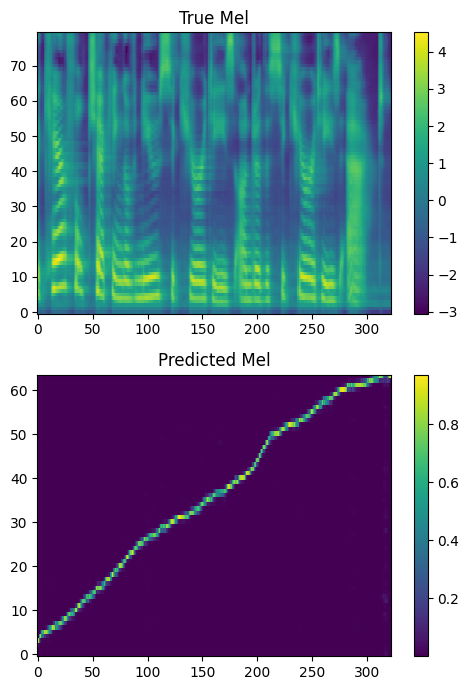

In [41]:
import pandas as pd
from model import Tacotron2Config, Tacotron2
import torch 
from tokenizer import Tokenizer
import matplotlib.pyplot as plt
from IPython.display import Audio
from dataset import AudioMelConversions

data = pd.read_csv("data/test_metadata.csv")

config = Tacotron2Config()
model = Tacotron2(config)
tokenizer = Tokenizer()
a2m = AudioMelConversions()

state_dict = torch.load('work_dir/no_wd/tacotron2/final_checkpoint/pytorch_model.bin', map_location=torch.device('cpu')) 
model.load_state_dict(state_dict)
model.eval()

def inference(text):
    print(f"Input Text: {text}")

    tokens = tokenizer.encode(text).unsqueeze(0)
    output, alignments  = model.inference(tokens)

    fig, axes = plt.subplots(2, 1, figsize=(5, 7))
    im0 = axes[0].imshow(output[0].T, aspect='auto', origin='lower', interpolation='none')
    axes[0].set_title("True Mel")
    fig.colorbar(im0, ax=axes[0])
    
    im1 = axes[1].imshow(alignments[0].T, aspect='auto', origin='lower', interpolation='none')
    axes[1].set_title("Predicted Mel")
    fig.colorbar(im1, ax=axes[1])

    plt.tight_layout()
    plt.show()
    
    audio = a2m.mel2audio(output[0].T, do_denorm=True)
    display(Audio(audio, rate=22050))

inference(data["normalized_transcript"][51])